In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from os.path import join, exists, basename
from glob import glob
import pickle
from tqdm.notebook import tqdm

In [2]:
model_path = 'models'

# Get Data

In [3]:
models = glob(join(model_path, '*'))

In [4]:
model = models[0]

with open(join(model, 'params.pkl'), 'rb') as f:
    params = pickle.load(f)

params['last_reward'] = params['rewards'][-1]
params['mean_reward'] = np.mean(params['rewards'])
params['std_reward'] = np.std(params['rewards'])
params['max_reward'] = np.max(params['rewards'])
params['min_reward'] = np.min(params['rewards'])
params['mean_5_reward'] = np.mean(params['rewards'][-5:])

# Remove rewards
params.pop('rewards')

print(params.keys())

dict_keys(['reuploading', 'cx', 'ladder', 'n_layers', 'seed', 'batch_size', 'lr', 'n_episodes', 'win_episodes_thr', 'max_steps', 'gamma', 'is_classical', 'epsilon_start', 'epsilon_decay', 'epsilon_min', 'buffer_size', 'target_update_freq', 'online_train_freq', 'win_thr', 'done', 'win', 'episode', 'last_reward', 'mean_reward', 'std_reward', 'max_reward', 'min_reward', 'mean_5_reward'])


In [5]:
params

{'reuploading': True,
 'cx': True,
 'ladder': False,
 'n_layers': 5,
 'seed': 5,
 'batch_size': 16,
 'lr': 0.001,
 'n_episodes': 1000,
 'win_episodes_thr': 10,
 'max_steps': 200,
 'gamma': 0.99,
 'is_classical': False,
 'epsilon_start': 1,
 'epsilon_decay': 0.99,
 'epsilon_min': 0.01,
 'buffer_size': 10000,
 'target_update_freq': 5,
 'online_train_freq': 1,
 'win_thr': 10,
 'done': True,
 'win': True,
 'episode': 251,
 'last_reward': 200.0,
 'mean_reward': 125.79761904761905,
 'std_reward': 72.76529672192287,
 'max_reward': 200.0,
 'min_reward': 11.0,
 'mean_5_reward': 200.0}

In [6]:
df = pd.DataFrame(columns=['reuploading', 'cx', 'ladder', 'n_layers', 'seed', 'batch_size', 'lr', 'n_episodes', 'win_episodes_thr', 'max_steps', 'gamma', 'is_classical', 'epsilon_start', 'epsilon_decay', 'epsilon_min', 'buffer_size', 'target_update_freq', 'online_train_freq', 'win_thr', 'rewards', 'done', 'win', 'episode'])

In [7]:
dfs = []
for model in tqdm(models):
    with open(join(model, 'params.pkl'), 'rb') as f:
        params = pickle.load(f)

    params['last_reward'] = params['rewards'][-1]
    params['mean_reward'] = np.mean(params['rewards'])
    params['std_reward'] = np.std(params['rewards'])
    params['max_reward'] = np.max(params['rewards'])
    params['min_reward'] = np.min(params['rewards'])
    params['mean_5_reward'] = np.mean(params['rewards'][-5:])

    # Remove rewards
    params.pop('rewards')

    dfs.append(pd.DataFrame(params, index=[0]))

df = pd.concat(dfs, ignore_index=True)

  0%|          | 0/400 [00:00<?, ?it/s]

In [8]:
df

,reuploading,cx,ladder,n_layers,seed,batch_size,lr,n_episodes,win_episodes_thr,max_steps,...,win_thr,done,win,episode,last_reward,mean_reward,std_reward,max_reward,min_reward,mean_5_reward
0,True,True,False,5,5,16,0.001,1000,10,200,...,10,True,True,251,200.0,125.797619,72.765297,200.0,11.0,200.0
1,False,True,True,3,10,16,0.001,1000,10,200,...,10,False,False,374,200.0,57.877333,42.113889,200.0,8.0,186.4
2,False,False,True,2,1,16,0.001,1000,10,200,...,10,True,True,346,200.0,59.904899,55.161901,200.0,8.0,200.0
3,True,False,False,5,4,16,0.001,1000,10,200,...,10,True,True,147,200.0,86.209459,63.112004,200.0,9.0,200.0
4,False,False,True,2,7,16,0.001,1000,10,200,...,10,True,True,232,200.0,28.291845,39.359908,200.0,8.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,True,False,False,2,8,16,0.001,1000,10,200,...,10,True,True,897,200.0,115.674833,42.756641,200.0,9.0,200.0
396,False,False,True,5,2,16,0.001,1000,10,200,...,10,True,True,340,200.0,134.117302,78.234614,200.0,8.0,200.0
397,True,True,False,4,2,16,0.001,1000,10,200,...,10,True,True,428,200.0,132.449883,68.158019,200.0,8.0,200.0
398,True,True,True,4,3,16,0.001,1000,10,200,...,10,True,True,173,190.0,109.511494,67.705731,200.0,10.0,198.0


# Plotting

In [9]:
searchgrid = {
    "reuploading" : [1, 0],
    "cx" : [1, 0],
    "ladder" : [1, 0],
    "n_layers" : list(range(1, 6)),
    "seed": list(range(1, 11)),
}

In [ ]:
# Reuploading -> Color
# CX, ladder -> x and y 'main fig'
# n_layers -> x axis along each plot
# seed -> each plot

In [10]:
df

,reuploading,cx,ladder,n_layers,seed,batch_size,lr,n_episodes,win_episodes_thr,max_steps,...,win_thr,done,win,episode,last_reward,mean_reward,std_reward,max_reward,min_reward,mean_5_reward
0,True,True,False,5,5,16,0.001,1000,10,200,...,10,True,True,251,200.0,125.797619,72.765297,200.0,11.0,200.0
1,False,True,True,3,10,16,0.001,1000,10,200,...,10,False,False,374,200.0,57.877333,42.113889,200.0,8.0,186.4
2,False,False,True,2,1,16,0.001,1000,10,200,...,10,True,True,346,200.0,59.904899,55.161901,200.0,8.0,200.0
3,True,False,False,5,4,16,0.001,1000,10,200,...,10,True,True,147,200.0,86.209459,63.112004,200.0,9.0,200.0
4,False,False,True,2,7,16,0.001,1000,10,200,...,10,True,True,232,200.0,28.291845,39.359908,200.0,8.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,True,False,False,2,8,16,0.001,1000,10,200,...,10,True,True,897,200.0,115.674833,42.756641,200.0,9.0,200.0
396,False,False,True,5,2,16,0.001,1000,10,200,...,10,True,True,340,200.0,134.117302,78.234614,200.0,8.0,200.0
397,True,True,False,4,2,16,0.001,1000,10,200,...,10,True,True,428,200.0,132.449883,68.158019,200.0,8.0,200.0
398,True,True,True,4,3,16,0.001,1000,10,200,...,10,True,True,173,190.0,109.511494,67.705731,200.0,10.0,198.0


In [14]:
# Replace bools with 0 and 1
df['reuploading'] = df['reuploading'].astype(int)
df['cx'] = df['cx'].astype(int)
df['ladder'] = df['ladder'].astype(int)
df

,reuploading,cx,ladder,n_layers,seed,batch_size,lr,n_episodes,win_episodes_thr,max_steps,...,win_thr,done,win,episode,last_reward,mean_reward,std_reward,max_reward,min_reward,mean_5_reward
0,1,1,0,5,5,16,0.001,1000,10,200,...,10,True,True,251,200.0,125.797619,72.765297,200.0,11.0,200.0
1,0,1,1,3,10,16,0.001,1000,10,200,...,10,False,False,374,200.0,57.877333,42.113889,200.0,8.0,186.4
2,0,0,1,2,1,16,0.001,1000,10,200,...,10,True,True,346,200.0,59.904899,55.161901,200.0,8.0,200.0
3,1,0,0,5,4,16,0.001,1000,10,200,...,10,True,True,147,200.0,86.209459,63.112004,200.0,9.0,200.0
4,0,0,1,2,7,16,0.001,1000,10,200,...,10,True,True,232,200.0,28.291845,39.359908,200.0,8.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,0,0,2,8,16,0.001,1000,10,200,...,10,True,True,897,200.0,115.674833,42.756641,200.0,9.0,200.0
396,0,0,1,5,2,16,0.001,1000,10,200,...,10,True,True,340,200.0,134.117302,78.234614,200.0,8.0,200.0
397,1,1,0,4,2,16,0.001,1000,10,200,...,10,True,True,428,200.0,132.449883,68.158019,200.0,8.0,200.0
398,1,1,1,4,3,16,0.001,1000,10,200,...,10,True,True,173,190.0,109.511494,67.705731,200.0,10.0,198.0


In [36]:
df[df["cx"] == 1][df["ladder"] == 1][df["reuploading"] == 1][df["n_layers"] == 1]["done"]

/tmp/ipykernel_1230030/3977887973.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["cx"] == 1][df["ladder"] == 1][df["reuploading"] == 1][df["n_layers"] == 1]["done"]
/tmp/ipykernel_1230030/3977887973.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["cx"] == 1][df["ladder"] == 1][df["reuploading"] == 1][df["n_layers"] == 1]["done"]
/tmp/ipykernel_1230030/3977887973.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["cx"] == 1][df["ladder"] == 1][df["reuploading"] == 1][df["n_layers"] == 1]["done"]


7      False
23     False
57     False
62     False
74     False
81     False
287    False
298    False
322    False
385    False
Name: done, dtype: bool

/tmp/ipykernel_1230030/1554465078.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],
/tmp/ipykernel_1230030/1554465078.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],
/tmp/ipykernel_1230030/1554465078.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],
/tmp/ipykernel_1230030/1554465078.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],


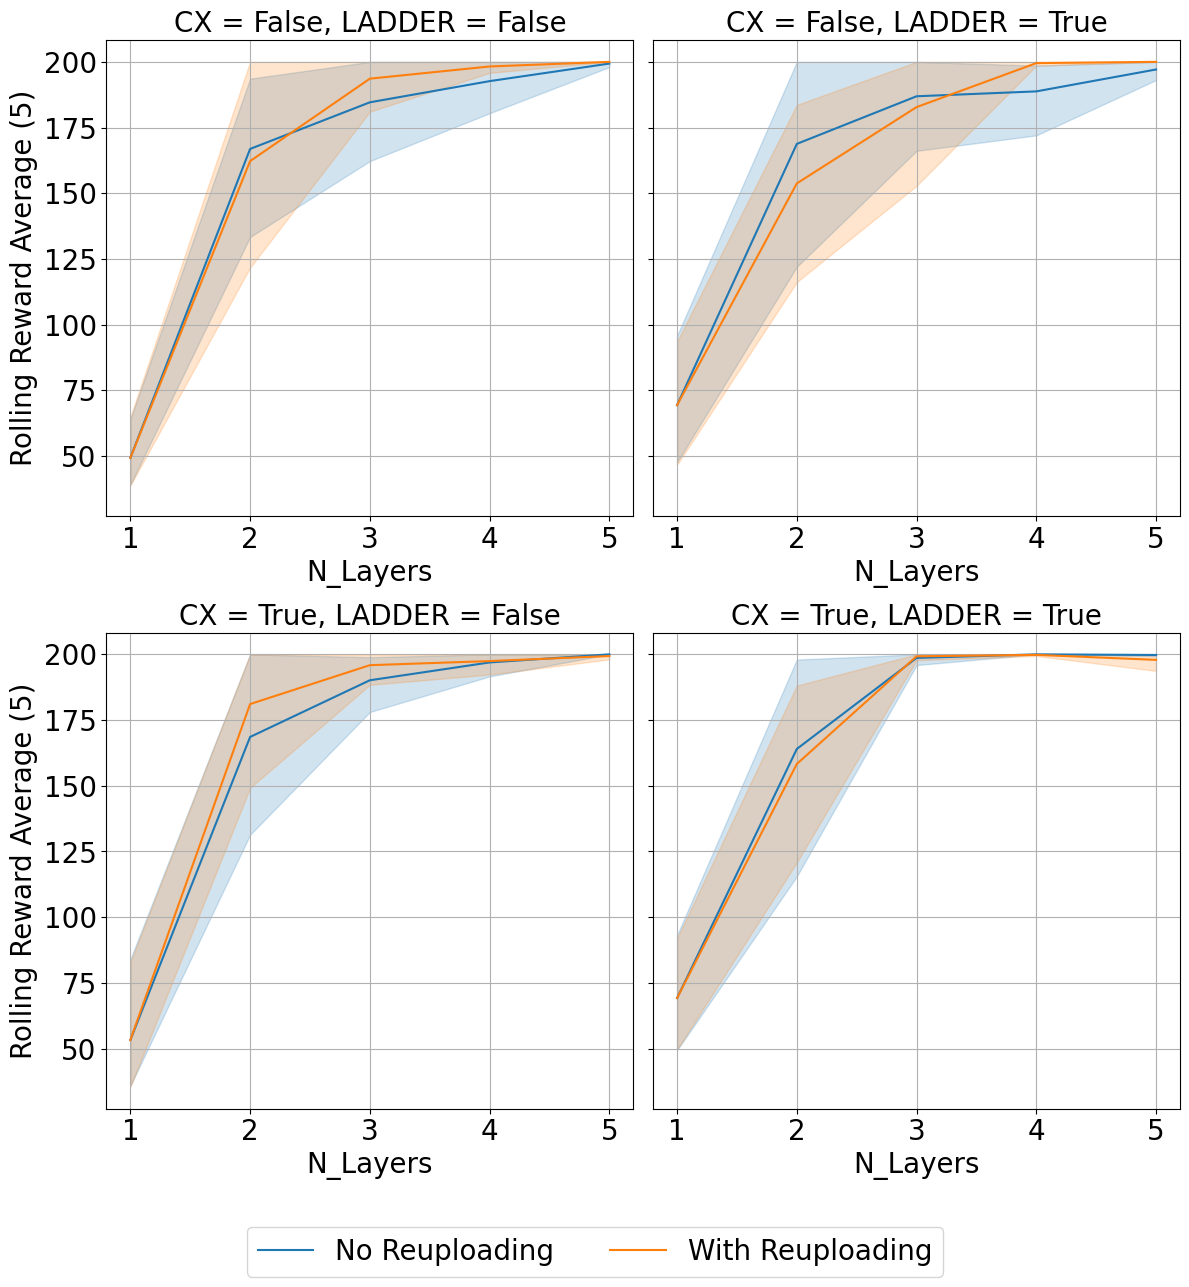

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

palette = {0: "C0", 1: "C1"}

LEGEND_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20
TICK_SIZE = 20

for cx in range(2):
    for ladder in range(2):
        ax_ = ax[cx, ladder]

        ax_.grid()

        sns.lineplot(
            x="n_layers",
            y="mean_5_reward",
            hue="reuploading",
            data=df[df["cx"] == cx][df["ladder"] == ladder],
            markers=True,
            dashes=True,
            markersize=8,
            ax=ax_,
            palette=palette,
            legend=True,
        )

        ax_.set_title(f"CX = {bool(cx)}, LADDER = {bool(ladder)}", fontsize=BIGGER_SIZE)
        ax_.set_xlabel("N_Layers", fontsize=MEDIUM_SIZE)
        ax_.set_ylabel("Rolling Reward Average (5)", fontsize=MEDIUM_SIZE)
        ax_.legend(fontsize=LEGEND_SIZE)
        ax_.tick_params(axis="both", which="major", labelsize=TICK_SIZE)
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]


labels = ["No Reuploading", "With Reuploading"]
fig.legend(lines, labels, loc="lower center", ncol=2, fontsize=LEGEND_SIZE, bbox_to_anchor=(0.5, -0.08))

# Remove all legends
for ax in fig.axes:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

fig.tight_layout()


/tmp/ipykernel_1230030/1868591321.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],
/tmp/ipykernel_1230030/1868591321.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(
/tmp/ipykernel_1230030/1868591321.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],
/tmp/ipykernel_1230030/1868591321.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(
/tmp/ipykernel_1230030/1868591321.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],
/tmp/ipykernel_1230030/1868591321.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(
/tmp/ipykernel_1230030/18685913

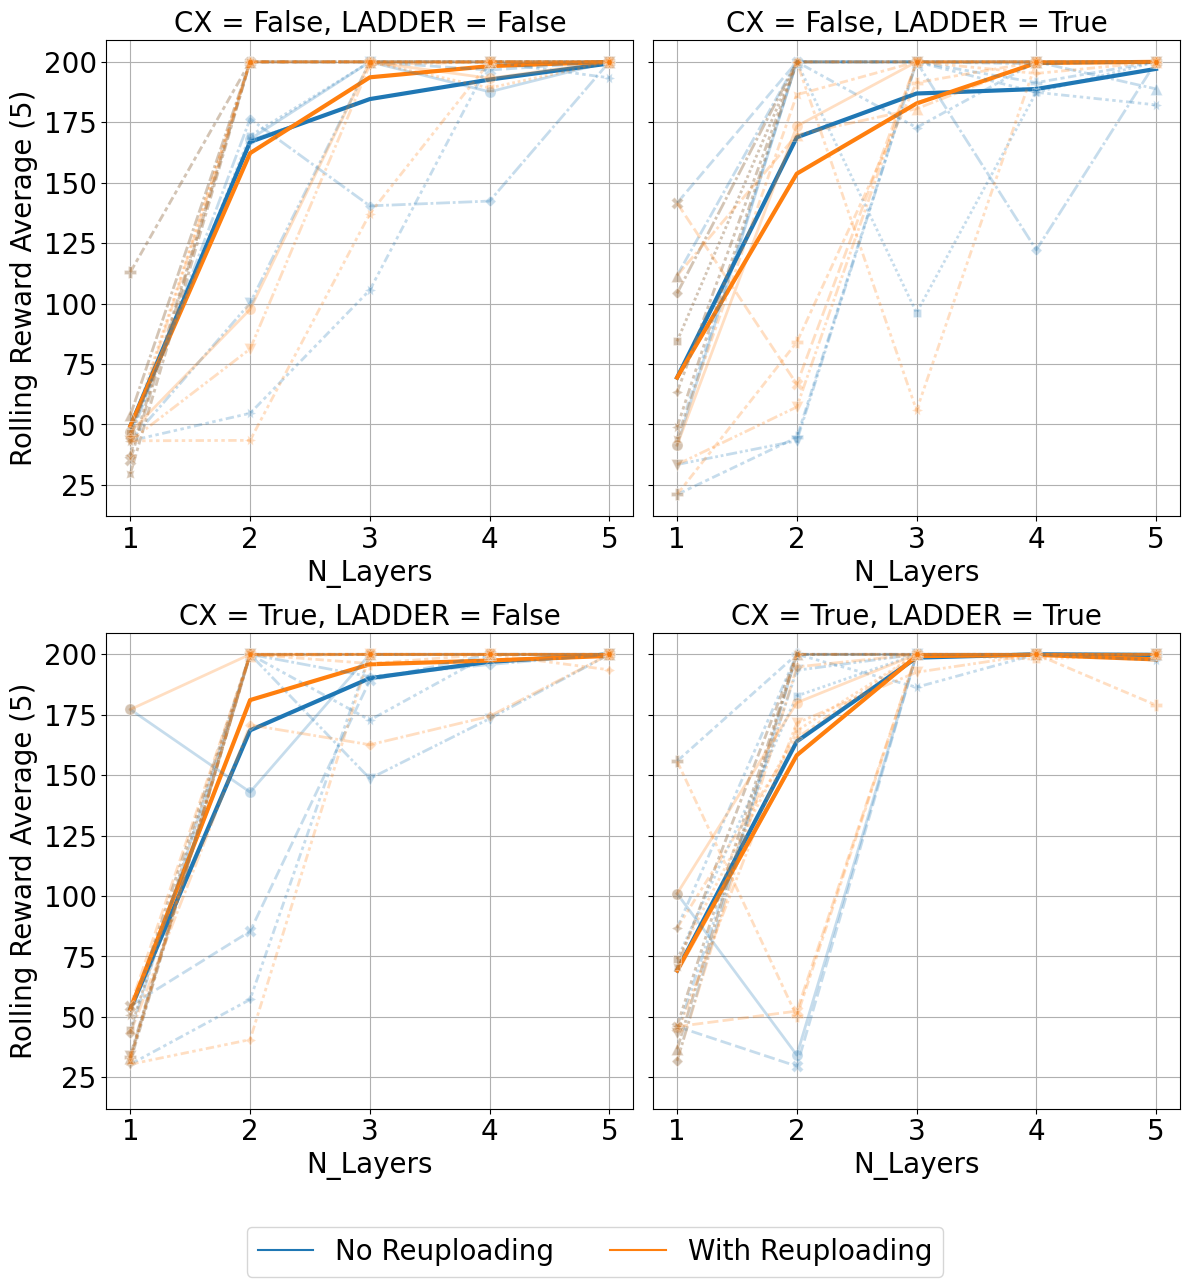

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

palette = {0: "C0", 1: "C1"}

LEGEND_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20
TICK_SIZE = 20

for cx in range(2):
    for ladder in range(2):
        ax_ = ax[cx, ladder]

        ax_.grid()

        sns.lineplot(
            x="n_layers",
            y="mean_5_reward",
            hue="reuploading",
            data=df[df["cx"] == cx][df["ladder"] == ladder],
            markers=True,
            dashes=True,
            markersize=8,
            ax=ax_,
            palette=palette,
            ci=0,
            linewidth=3,
        )

        sns.lineplot(
            x="n_layers",
            y="mean_5_reward",
            hue="reuploading",
            style="seed",
            data=df[df["cx"] == cx][df["ladder"] == ladder],
            markers=True,
            dashes=True,
            markersize=8,
            ax=ax_,
            palette=palette,
            ci=0,
            alpha=0.25,
            legend=False,
            linewidth=2,
        )

        ax_.set_title(f"CX = {bool(cx)}, LADDER = {bool(ladder)}", fontsize=BIGGER_SIZE)
        ax_.set_xlabel("N_Layers", fontsize=MEDIUM_SIZE)
        ax_.set_ylabel("Rolling Reward Average (5)", fontsize=MEDIUM_SIZE)
        ax_.legend(fontsize=LEGEND_SIZE)
        ax_.tick_params(axis="both", which="major", labelsize=TICK_SIZE)
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]


labels = ["No Reuploading", "With Reuploading"]
fig.legend(lines, labels, loc="lower center", ncol=2, fontsize=LEGEND_SIZE, bbox_to_anchor=(0.5, -0.08))

# Remove all legends
for ax in fig.axes:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

fig.tight_layout()


In [43]:
df.columns

Index(['reuploading', 'cx', 'ladder', 'n_layers', 'seed', 'batch_size', 'lr',
       'n_episodes', 'win_episodes_thr', 'max_steps', 'gamma', 'is_classical',
       'epsilon_start', 'epsilon_decay', 'epsilon_min', 'buffer_size',
       'target_update_freq', 'online_train_freq', 'win_thr', 'done', 'win',
       'episode', 'last_reward', 'mean_reward', 'std_reward', 'max_reward',
       'min_reward', 'mean_5_reward'],
      dtype='object')

/tmp/ipykernel_1230030/1085581489.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],
/tmp/ipykernel_1230030/1085581489.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],
/tmp/ipykernel_1230030/1085581489.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],
/tmp/ipykernel_1230030/1085581489.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],


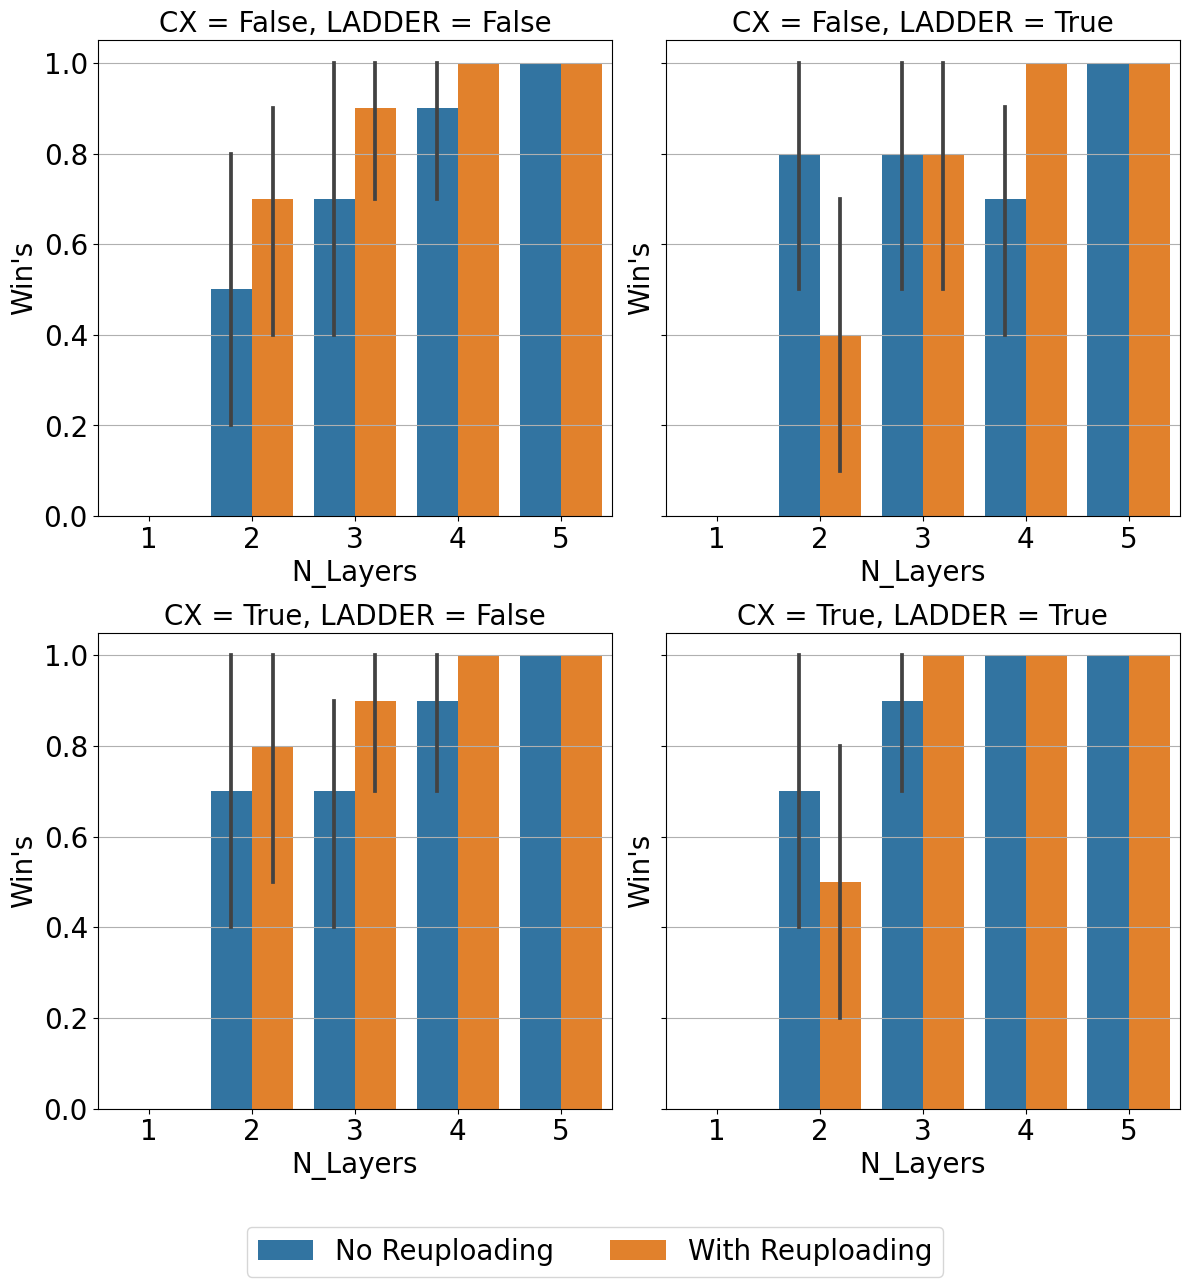

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

palette = {0: "C0", 1: "C1"}

LEGEND_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20
TICK_SIZE = 20

for cx in range(2):
    for ladder in range(2):
        ax_ = ax[cx, ladder]

        ax_.grid()

        # Plot barchart of done vs not done
        sns.barplot(
            x="n_layers",
            y="win",
            hue="reuploading",
            data=df[df["cx"] == cx][df["ladder"] == ladder],
            ax=ax_,
            palette=palette,
            #legend=True,
        )

        ax_.set_title(f"CX = {bool(cx)}, LADDER = {bool(ladder)}", fontsize=BIGGER_SIZE)
        ax_.set_xlabel("N_Layers", fontsize=MEDIUM_SIZE)
        ax_.set_ylabel("Win's", fontsize=MEDIUM_SIZE)
        ax_.legend(fontsize=LEGEND_SIZE)
        ax_.tick_params(axis="both", which="major", labelsize=TICK_SIZE)
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]


labels = ["No Reuploading", "With Reuploading"]
fig.legend(lines, labels, loc="lower center", ncol=2, fontsize=LEGEND_SIZE, bbox_to_anchor=(0.5, -0.08))

# Remove all legends
for ax in fig.axes:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

fig.tight_layout()


### Best episode

/tmp/ipykernel_1230030/2760164889.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],
/tmp/ipykernel_1230030/2760164889.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],
/tmp/ipykernel_1230030/2760164889.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],
/tmp/ipykernel_1230030/2760164889.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df["cx"] == cx][df["ladder"] == ladder],


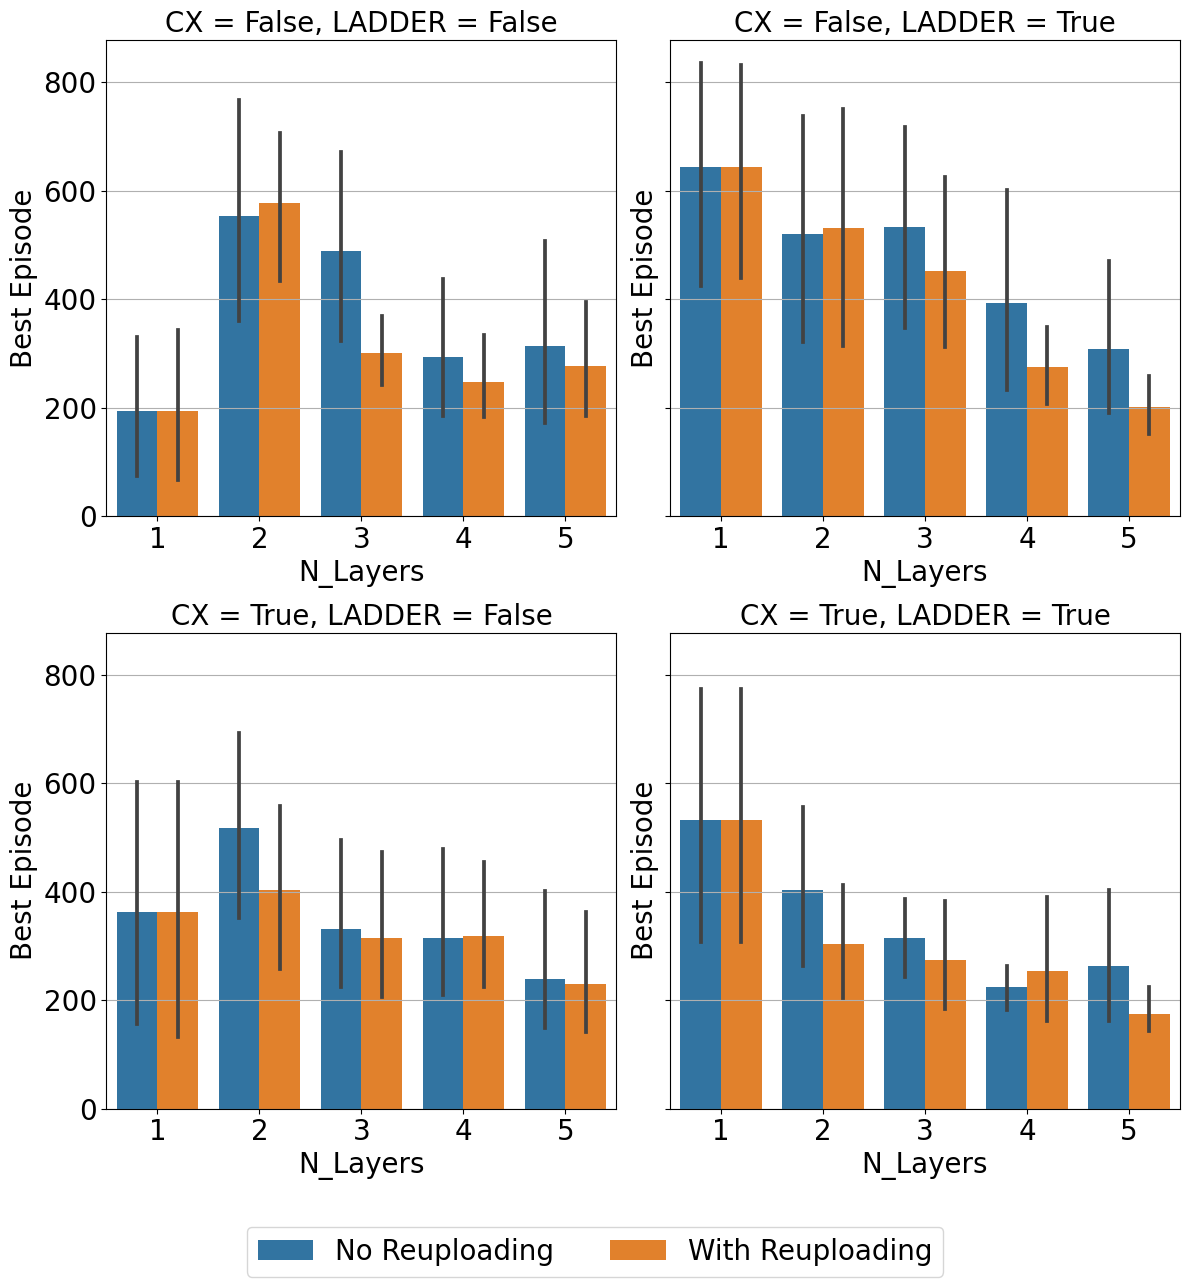

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

palette = {0: "C0", 1: "C1"}

LEGEND_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20
TICK_SIZE = 20

for cx in range(2):
    for ladder in range(2):
        ax_ = ax[cx, ladder]
Win's
        ax_.grid()

        # Plot barchart of done vs not done
        sns.barplot(
            x="n_layers",
            y="episode",
            hue="reuploading",
            data=df[df["cx"] == cx][df["ladder"] == ladder],
            ax=ax_,
            palette=palette,
            #legend=True,
        )

        ax_.set_title(f"CX = {bool(cx)}, LADDER = {bool(ladder)}", fontsize=BIGGER_SIZE)
        ax_.set_xlabel("N_Layers", fontsize=MEDIUM_SIZE)
        ax_.set_ylabel("Best Episode", fontsize=MEDIUM_SIZE)
        ax_.legend(fontsize=LEGEND_SIZE)
        ax_.tick_params(axis="both", which="major", labelsize=TICK_SIZE)
        
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]


labels = ["No Reuploading", "With Reuploading"]
fig.legend(lines, labels, loc="lower center", ncol=2, fontsize=LEGEND_SIZE, bbox_to_anchor=(0.5, -0.08))

# Remove all legends
for ax in fig.axes:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

fig.tight_layout()
